In [1]:
import numpy as np
from collections import defaultdict

from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from pommerman.constants import BOARD_SIZE

Import error! You will not be able to render --> Cannot connect to "None"


In [2]:
labels = np.load('./dagger/train_data2/labels.npy')
obs = np.load('./dagger/train_data2/obs.npy')

In [3]:
lll = np.argmax(labels, axis=1)

In [5]:
cur_value = -1
dic = []
ind = []
for i, label in enumerate(lll):    
    if label != cur_value:                    
        cur_value = label        
        dic.append(0)
    dic[-1] += 1
    if cur_value != -1 and dic[-1] > 15:
        pass
    else:
        ind.append(i)

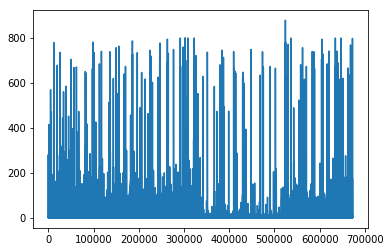

In [6]:
plt.plot(np.arange(len(dic)), dic)

In [7]:
labels = labels[ind]

In [8]:
obs = obs[ind]

In [9]:
lll = np.argmax(labels, axis=1)

In [10]:
cur_value = -1
dic = []
ind = []
for i, label in enumerate(lll):    
    if label != cur_value:                    
        cur_value = label        
        dic.append(0)
    dic[-1] += 1
    if cur_value != -1 and dic[-1] > 15:
        pass
    else:
        ind.append(i)

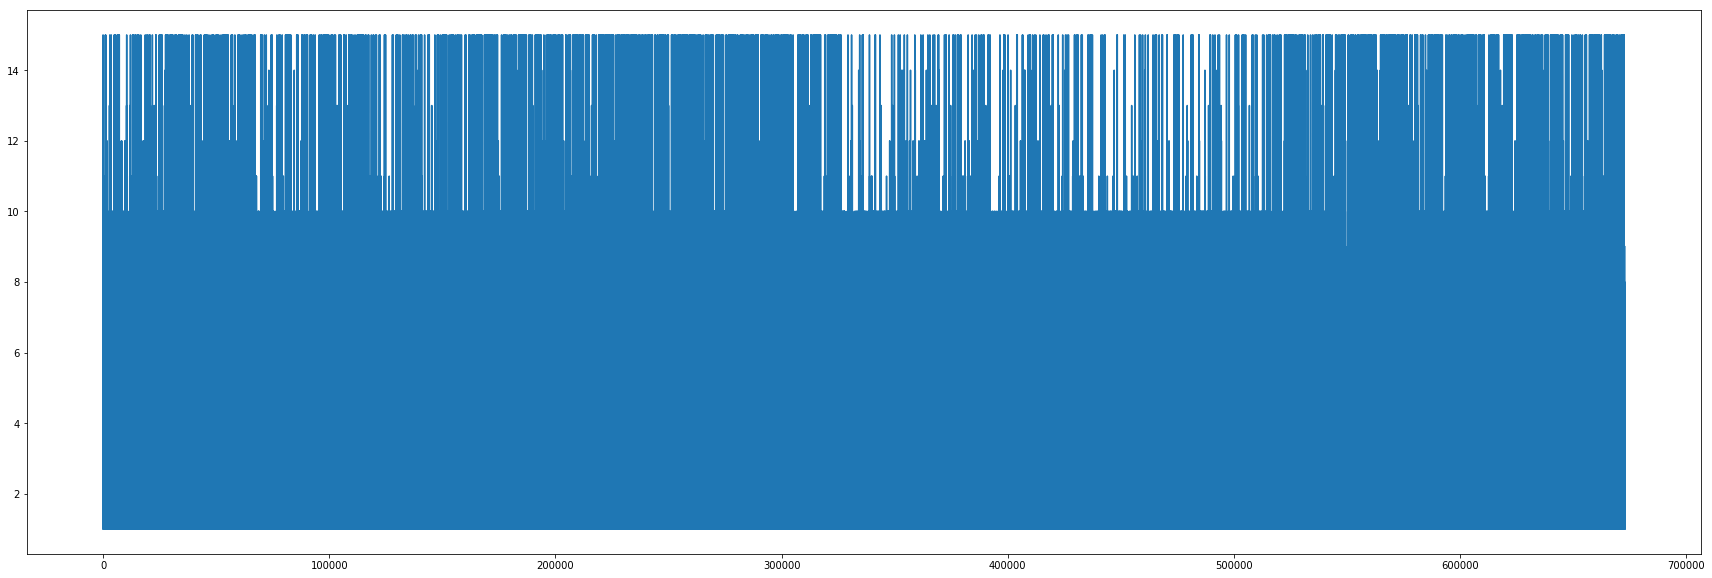

In [15]:
plt.figure(figsize=(30,10))
plt.plot(np.arange(len(dic)), dic)

In [77]:
np.sum(labels, axis=0) / np.sum(labels)

array([0.16567498, 0.20231438, 0.18848014, 0.19846301, 0.20222366,
       0.04284384], dtype=float32)

In [78]:
len(labels)

1069232

In [79]:
np.save('./dagger/train_data3/labels.npy', labels)
np.save('./dagger/train_data3/obs.npy', obs)

In [80]:
def featurize(obs):
    shape = (BOARD_SIZE, BOARD_SIZE, 1)

    def get_matrix(dict, key):
        res = dict[key]
        return res.reshape(shape).astype(np.float32)

    def get_map(board, item):
        map = np.zeros(shape)
        map[board == item] = 1
        return map

    board = get_matrix(obs, 'board')

    # TODO: probably not needed Passage = 0
    rigid_map = get_map(board, 1)               # Rigid = 1
    wood_map = get_map(board, 2)                # Wood = 2
    bomb_map = get_map(board, 3)                # Bomb = 3
    flames_map = get_map(board, 4)              # Flames = 4
    fog_map = get_map(board, 5)                 # TODO: not used for first two stages Fog = 5
    extra_bomb_map = get_map(board, 6)          # ExtraBomb = 6
    incr_range_map = get_map(board, 7)          # IncrRange = 7
    kick_map = get_map(board, 8)                # Kick = 8
    skull_map = get_map(board, 9)               # Skull = 9

    position = obs["position"]
    my_position = np.zeros(shape)
    my_position[position[0], position[1], 0] = 1

    team_mates = get_map(board, obs["teammate"].value) # TODO during documentation it should be an array

    enemies = np.zeros(shape)
    for enemy in obs["enemies"]:
        enemies[board == enemy.value] = 1

    bomb_blast_strength = get_matrix(obs, 'bomb_blast_strength')
    bomb_life = get_matrix(obs, 'bomb_life')

    ammo = np.full((BOARD_SIZE, BOARD_SIZE, 1), obs["ammo"])
    blast_strength = np.full((BOARD_SIZE, BOARD_SIZE, 1), obs["blast_strength"])
    can_kick = np.full((BOARD_SIZE, BOARD_SIZE, 1), int(obs["can_kick"]))

    obs = np.concatenate([my_position, enemies, team_mates, rigid_map,
                          wood_map, bomb_map, flames_map,
                          fog_map, extra_bomb_map, incr_range_map,
                          kick_map, skull_map, bomb_blast_strength,
                          bomb_life, ammo, blast_strength, can_kick], axis=2)
    return obs    

In [81]:
temp = []
for o in tqdm(obs):
    temp.append(featurize(o))
obs = np.array(temp)

In [82]:
np.save('./dagger/train_data3/obs_map.npy', obs)